<a href="https://colab.research.google.com/github/2303A52269/Explainable-AI/blob/main/Copy_of_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Exploratory Data Analysis (EDA)

Shape: (2200, 8)

Data types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


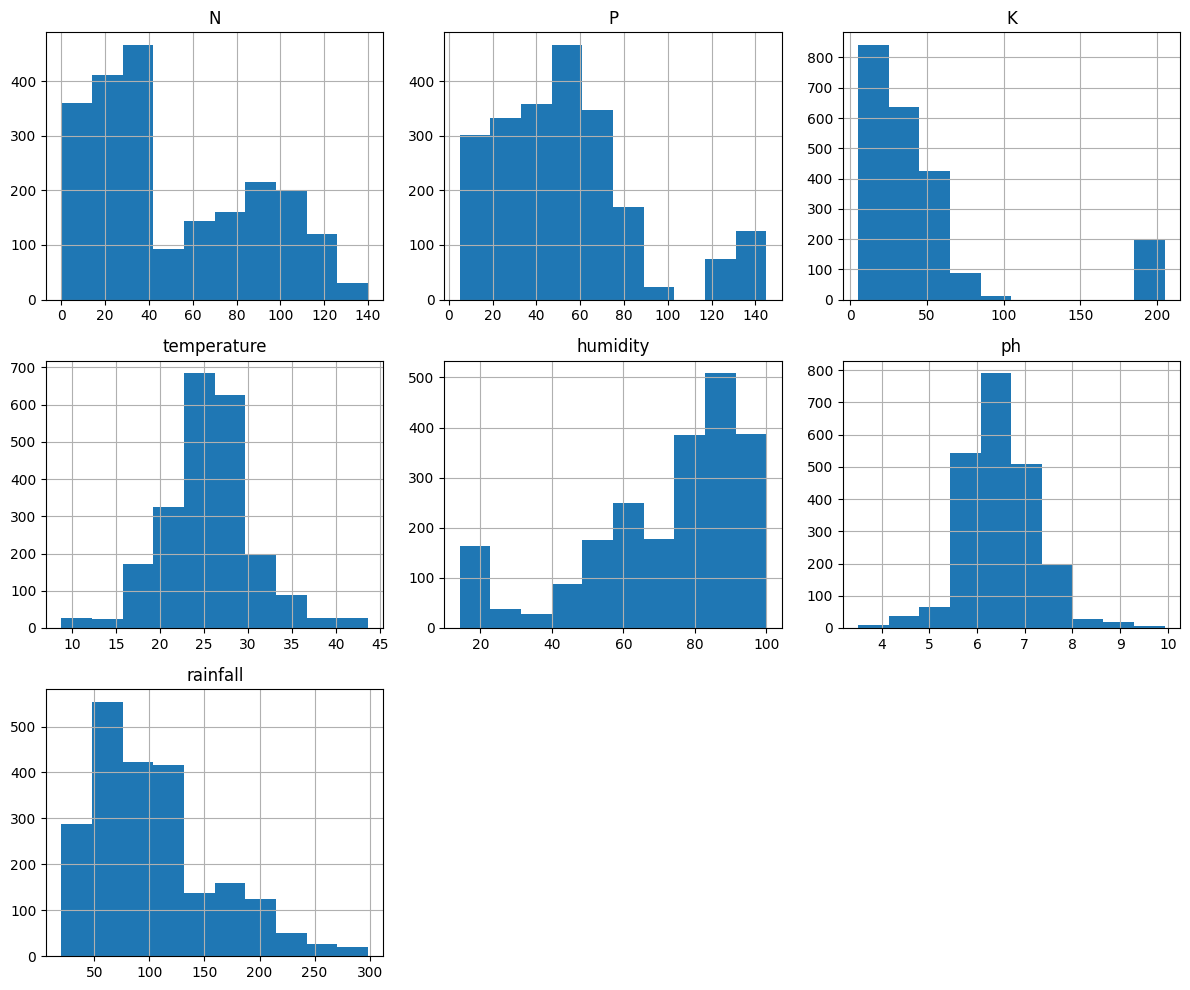

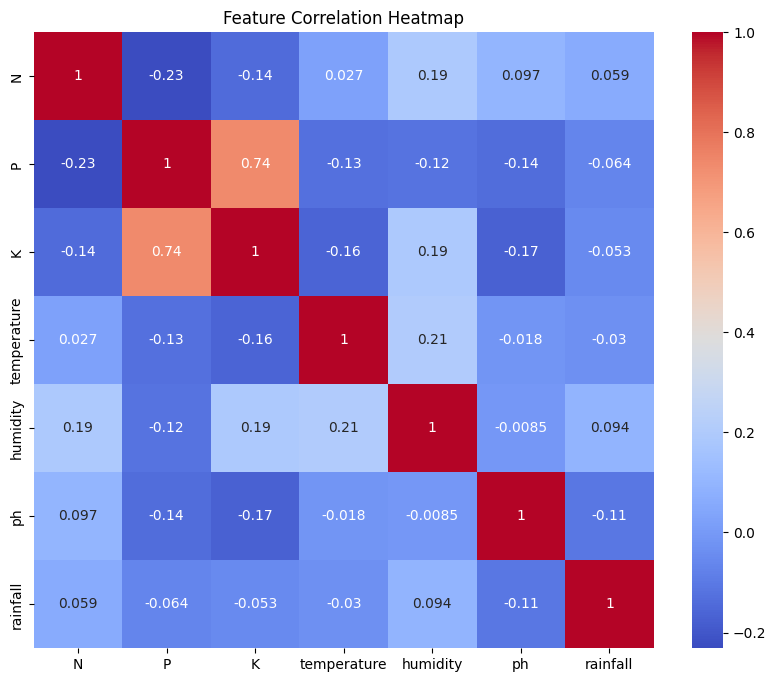

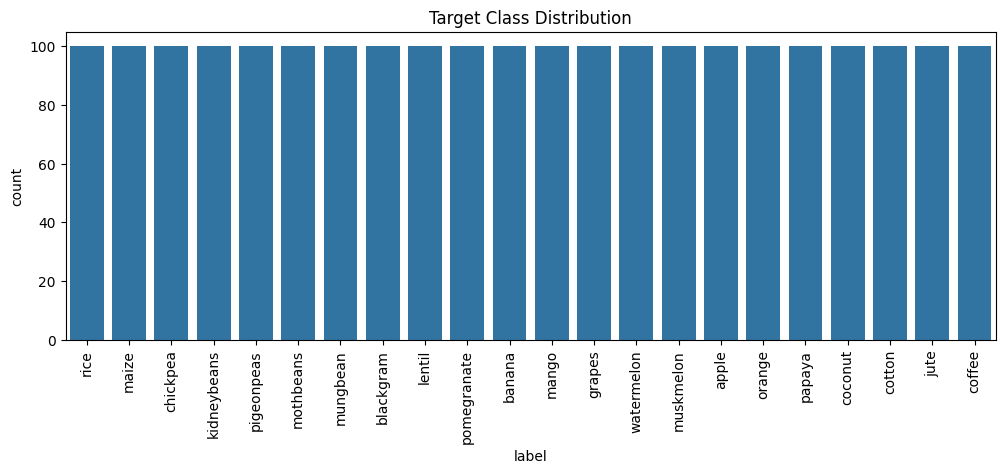


Before SMOTE: [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100]
After SMOTE: [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/Crop_recommendation.csv")
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
display(df.describe())

# Visualize distributions
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm') # Exclude non-numeric column
plt.title("Feature Correlation Heatmap")
plt.show()

# Target class distribution
plt.figure(figsize=(12, 4))
sns.countplot(x='label', data=df)
plt.title("Target Class Distribution")
plt.xticks(rotation=90)
plt.show()

# Handle class imbalance (SMOTE)
from sklearn.preprocessing import LabelEncoder
X = df.drop('label', axis=1)
y = df['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y_encoded)

print("\nBefore SMOTE:", np.bincount(y_encoded))
print("After SMOTE:", np.bincount(y_res))

2.Preprocessing

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

df = pd.read_csv("Crop_recommendation.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nMissing values before handling:\n", df.isnull().sum())

# The dataset typically has no missing values, but we’ll handle them safely
if df.isnull().sum().any():
    # Fill numeric columns with median
    df = df.fillna(df.median(numeric_only=True))
    # Fill categorical columns with mode
    for col in df.select_dtypes(include='object').columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

# 'label' is the target column (crop type)
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Print mapping for reference
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("\nLabel Encoding Mapping:")
for k, v in label_mapping.items():
    print(f"{k} → {v}")

X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# Choose one: StandardScaler (Z-score) or MinMaxScaler (0–1)
scaler = StandardScaler()      # or use MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Preprocessing Complete!")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("Number of Classes:", len(np.unique(y)))
print("Classes:", list(le.classes_))


✅ Dataset loaded successfully!
Shape: (2200, 8)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Missing values before handling:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Missing values after handling:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Label Encoding Mapping:
apple → 0
banana → 1
blackgram → 2
chickpea → 3
coconut → 4
coffee → 5
cotton → 6
grapes → 7
jute → 8
kidneybeans → 9
lentil → 10
maize → 11
mango → 12
mothbeans → 13
mungbean → 14
muskmelon → 15
orange → 16
papaya → 17
pigeonpeas → 18
pomegranate → 19
rice → 20
watermelon → 21

✅ Preprocessing Complete!
Training Set Shape: (1760, 7)
Testing Set Shape: (440, 7)
Number of Classes: 22
Classes: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', '

3.Machine Learning Models

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1": f1_score(y_test, y_pred, average='weighted'),
    }

results_df = pd.DataFrame(results).T
print("\n=== Machine Learning Model Performance ===")
display(results_df)



=== Machine Learning Model Performance ===


,Accuracy,Precision,Recall,F1
Logistic Regression,0.972727,0.974022,0.972727,0.972464
Decision Tree,0.979545,0.980598,0.979545,0.979423
Random Forest,0.993182,0.993506,0.993182,0.993178
SVM,0.984091,0.985610,0.984091,0.984038
KNN,0.979545,0.980356,0.979545,0.979283
Gradient Boosting,0.988636,0.989742,0.988636,0.988723


4.Deep Learning Models

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np

num_classes = len(np.unique(y_train))

# --- MLP ---
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0)

# --- CNN ---
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1],1)),
    Conv1D(64, 2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0)

# --- LSTM ---
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

lstm = Sequential([
    LSTM(64, input_shape=(X_train.shape[1],1)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_lstm, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0)

# Evaluate DL models
from sklearn.metrics import f1_score, accuracy_score

dl_results = {}

for name, model, X_t in [
    ("MLP", mlp, X_test),
    ("CNN", cnn, X_test_cnn),
    ("LSTM", lstm, X_test_lstm)
]:
    y_pred = np.argmax(model.predict(X_t), axis=1)
    dl_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred, average='weighted')
    }

dl_results_df = pd.DataFrame(dl_results).T
print("\n=== Deep Learning Model Performance ===")
display(dl_results_df)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

=== Deep Learning Model Performance ===


,Accuracy,F1
MLP,0.977273,0.977190
CNN,0.988636,0.988632
LSTM,0.918182,0.917593


5.Explainable AI (XAI)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6f714ecccb1fa33eeddb355747417ba1e549800a2a8d9bd5ba50790a818db355
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


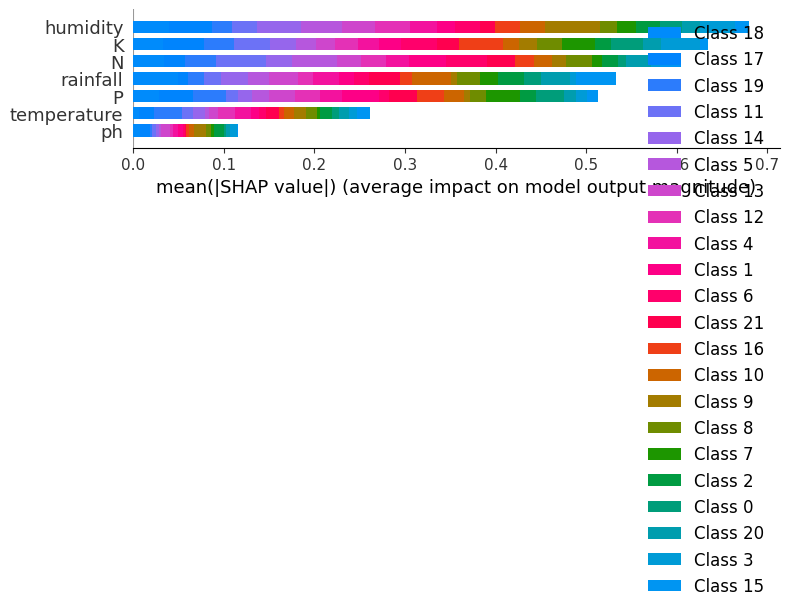

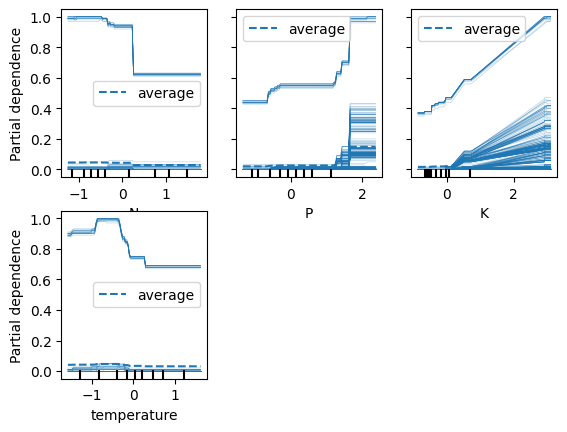

In [ ]:
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

rf = models["Random Forest"]

# --- SHAP ---
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Handle multi-output SHAP values by plotting mean absolute values
# shap_values is a list of arrays, one for each class, with shape (n_samples, n_features)
# We can plot the mean absolute SHAP value for each feature across all classes
shap.summary_plot(
    shap_values, # This will now be a list of arrays (n_samples, n_features)
    X_test,
    feature_names=X.columns,
    plot_type="bar" # Using bar plot for mean absolute SHAP values
)


# --- LIME ---
# Assuming X_train and X_test are pandas DataFrames with original column names
# If they are numpy arrays, you would need to handle feature names differently
lime_explainer = LimeTabularExplainer(
    X_train, feature_names=X.columns.tolist(), class_names=le.classes_.tolist(), discretize_continuous=True
)
# Ensure X_test[0] is a numpy array if X_test is a numpy array
exp = lime_explainer.explain_instance(X_test[0], rf.predict_proba, num_features=X.shape[1])
exp.show_in_notebook(show_table=True)


# --- PDP & ICE ---
features_to_plot = ['N', 'P', 'K', 'temperature']
# PartialDependenceDisplay expects X_test to be a pandas DataFrame or numpy array
# and features to be either column names (if DataFrame) or indices (if numpy array)
# Since X_test is likely a numpy array after scaling, use indices
feature_indices_to_plot = [X.columns.get_loc(col) for col in features_to_plot]
PartialDependenceDisplay.from_estimator(rf, X_test, feature_indices_to_plot, kind="both", feature_names=X.columns.tolist(), target=0)
plt.show()

6.Comparative Analysis

In [ ]:

print("=== Machine Learning Results ===")
display(results_df)
print("\n=== Deep Learning Results ===")
display(dl_results_df)

print("""
📊 Comparative Analysis:
- ML models (Random Forest, Gradient Boosting) are efficient and interpretable.
- DL models (MLP, CNN, LSTM) may slightly improve accuracy but require more compute.
✅ Recommendation: Use Random Forest for real-world deployment due to its strong balance of performance, speed, and explainability.
""")


=== Machine Learning Results ===


,Accuracy,Precision,Recall,F1
Logistic Regression,0.972727,0.974022,0.972727,0.972464
Decision Tree,0.979545,0.980598,0.979545,0.979423
Random Forest,0.993182,0.993506,0.993182,0.993178
SVM,0.984091,0.985610,0.984091,0.984038
KNN,0.979545,0.980356,0.979545,0.979283
Gradient Boosting,0.988636,0.989742,0.988636,0.988723



=== Deep Learning Results ===


,Accuracy,F1
MLP,0.977273,0.977190
CNN,0.988636,0.988632
LSTM,0.918182,0.917593



📊 Comparative Analysis:
- ML models (Random Forest, Gradient Boosting) are efficient and interpretable.
- DL models (MLP, CNN, LSTM) may slightly improve accuracy but require more compute.
✅ Recommendation: Use Random Forest for real-world deployment due to its strong balance of performance, speed, and explainability.

